In [1]:
""" 导入模块 """
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

warnings.filterwarnings('ignore')

D:\anaconda3\envs\lkm\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
""" 创建SparkSession对象 """
spark = SparkSession.builder.appName('K_means').getOrCreate()

In [3]:
""" 读取数据集 """
df = spark.read.csv(r"G:\LKM\PySark机器学习、自然语言处理与推荐系统\聚类\iris_dataset.csv", inferSchema=True, header=True)

df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [4]:
""" 查看数据维度 """
(df.count(), len(df.columns))

(150, 5)

In [5]:
""" 查看数据类型 """
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [6]:
""" 随机打乱数据，查看数据集 """
df.orderBy(rand()).show(10, False)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|species   |
+------------+-----------+------------+-----------+----------+
|6.1         |2.8        |4.0         |1.3        |versicolor|
|6.2         |2.8        |4.8         |1.8        |virginica |
|5.5         |4.2        |1.4         |0.2        |setosa    |
|7.4         |2.8        |6.1         |1.9        |virginica |
|6.8         |2.8        |4.8         |1.4        |versicolor|
|5.0         |2.3        |3.3         |1.0        |versicolor|
|5.4         |3.9        |1.7         |0.4        |setosa    |
|6.9         |3.2        |5.7         |2.3        |virginica |
|4.4         |3.2        |1.3         |0.2        |setosa    |
|5.0         |3.2        |1.2         |0.2        |setosa    |
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



In [7]:
""" 查看各类的数量 """
df.groupBy('species').count().orderBy('count').show(10, False)

+----------+-----+
|species   |count|
+----------+-----+
|virginica |50   |
|versicolor|50   |
|setosa    |50   |
+----------+-----+



In [8]:
""" 特征工程：使用VectorAssembler将所有的输入特征合并到向量中 """
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vec_assembler = VectorAssembler(inputCols=input_cols, outputCol='features')
final_data = vec_assembler.transform(df)

final_data.show(10, False)

+------------+-----------+------------+-----------+-------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species|features         |
+------------+-----------+------------+-----------+-------+-----------------+
|5.1         |3.5        |1.4         |0.2        |setosa |[5.1,3.5,1.4,0.2]|
|4.9         |3.0        |1.4         |0.2        |setosa |[4.9,3.0,1.4,0.2]|
|4.7         |3.2        |1.3         |0.2        |setosa |[4.7,3.2,1.3,0.2]|
|4.6         |3.1        |1.5         |0.2        |setosa |[4.6,3.1,1.5,0.2]|
|5.0         |3.6        |1.4         |0.2        |setosa |[5.0,3.6,1.4,0.2]|
|5.4         |3.9        |1.7         |0.4        |setosa |[5.4,3.9,1.7,0.4]|
|4.6         |3.4        |1.4         |0.3        |setosa |[4.6,3.4,1.4,0.3]|
|5.0         |3.4        |1.5         |0.2        |setosa |[5.0,3.4,1.5,0.2]|
|4.4         |2.9        |1.4         |0.2        |setosa |[4.4,2.9,1.4,0.2]|
|4.9         |3.1        |1.5         |0.1        |setosa |[4.9,

In [10]:
# """ 构建K均值聚类模型 """
# errors = []

# for k in range(2, 10):
#     kmeans = KMeans(featuresCol='features', k=k)
#     model = kmeans.fit(final_data)
#     intra_distance = model.computeCost(final_data)
#     errors.append(intra_distance)

AttributeError: 'KMeansModel' object has no attribute 'computeCost'

In [11]:
""" 构建K=3的聚类模型 """
kmeans = KMeans(featuresCol='features', k=3)
model = kmeans.fit(final_data)
model.transform(final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   61|
|         2|   39|
|         0|   50|
+----------+-----+



In [12]:
predictions = model.transform(final_data)
predictions.groupBy('species', 'prediction').count().show()

+----------+----------+-----+
|   species|prediction|count|
+----------+----------+-----+
| virginica|         2|   36|
|    setosa|         0|   50|
| virginica|         1|   14|
|versicolor|         1|   47|
|versicolor|         2|    3|
+----------+----------+-----+



In [13]:
""" 将数据转为DataFrame """
pandas_df = predictions.toPandas()
pandas_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,features,prediction
0,5.1,3.5,1.4,0.2,setosa,"[5.1, 3.5, 1.4, 0.2]",0
1,4.9,3.0,1.4,0.2,setosa,"[4.9, 3.0, 1.4, 0.2]",0
2,4.7,3.2,1.3,0.2,setosa,"[4.7, 3.2, 1.3, 0.2]",0
3,4.6,3.1,1.5,0.2,setosa,"[4.6, 3.1, 1.5, 0.2]",0
4,5.0,3.6,1.4,0.2,setosa,"[5.0, 3.6, 1.4, 0.2]",0


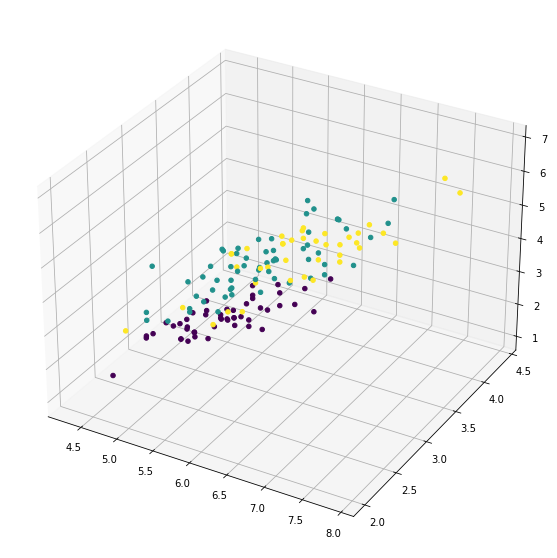

In [15]:
""" 聚类的可视化 """
cluster_vis = plt.figure(figsize=(12,10)).gca(projection='3d')
cluster_vis.scatter(pandas_df.sepal_length, pandas_df.sepal_width, pandas_df.petal_length, c=pandas_df.prediction, depthshade=False)
plt.show()